# Instacart 2017 Analysis 
#### Instacart is a prominent grocery delivery platform that enables customers to order groceries online and have them delivered to their doorstep. Similar to services like Uber Eats and DoorDash, Instacart provides convenience by allowing users to shop from their preferred stores and have their groceries delivered.
#### The primary objective of this project is to clean and explore the provided dataset, uncovering insights into the shopping behaviors and habits of Instacart customers. Each step involves cleaning the data, performing analysis, and providing detailed explanations of the findings.


In [1]:
#pip install pandas

The Pandas library is powerful library used for data manipulation and analysis. 
The Matplotlib library is used for plotting

In [58]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In order to use Datasets we first have to upload the files by defining a file paths. For this project we will be using datasets related to Instacart

In [3]:
# Define the file paths for the CSV files
orders_path = "datasets/instacart_orders.csv"
products_path = "datasets/products.csv"
aisles_path = "datasets/aisles.csv"
departments_path = "datasets/departments.csv"
order_products_path = "datasets/order_products.csv"

Next we import data from the CSV files into Pandas DataFrames, so that way we can use the dataset for data manipulation and anylysis. 

In [4]:
# Read data with appropriate arguments to handle nonstandard formatting
orders = pd.read_csv(orders_path, delimiter=';')
products = pd.read_csv(products_path, delimiter=';')
aisles = pd.read_csv(aisles_path, delimiter=';')
departments = pd.read_csv(departments_path, delimiter=';')
order_products = pd.read_csv(order_products_path, delimiter=';')

In order to have smooth sailing the initial exploration helps in understanding the structure of the data, confirming successful data import, and laying the groundwork for data manipulation and analysis.

In [5]:
# Displaying the first few rows of each DataFrame
# Check current data types of columns in each DataFrame
display("Orders DataFrame:")
display(orders.head())
display(orders.info())

display("\nProducts DataFrame:")
display(products.head())
display(products.info())

display("\nAisles DataFrame:")
display(aisles.head())
display(aisles.info())

display("\nDepartments DataFrame:")
display(departments.head())
display(departments.info())

display("\nOrder Products DataFrame:")
display(order_products.head())
display(order_products.info())

'Orders DataFrame:'

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


None

'\nProducts DataFrame:'

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


None

'\nAisles DataFrame:'

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


None

'\nDepartments DataFrame:'

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


None

'\nOrder Products DataFrame:'

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


None

The result shows that there are a few things that needs to be fixed. The Orders Dataframe shows that days_since_prior_order column is a float, since we will not be using this column for any manipulation it is not necessary to convert it into interger. For the Products DataFrame there seems to be a duplicated column labeled as  'product_name_lower'. The rest of the DataFrame seems to not have alot of issues going on since most of the necessary columns are in interger. 

In [6]:
# Verify and fix data types (converting ID columns to integers)
orders['order_id'] = orders['order_id'].astype(int)
orders['user_id'] = orders['user_id'].astype(int)
products['product_id'] = products['product_id'].astype(int)
aisles['aisle_id'] = aisles['aisle_id'].astype(int)
departments['department_id'] = departments['department_id'].astype(int)
order_products['add_to_cart_order'].fillna(0, inplace=True) # Replace non-finite values with 0 in 'add_to_cart_order' column
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].astype(int) # Convert 'add_to_cart_order' column to integers

## Find and remove duplicate values (and describe why you make your choices)

### `orders` data frame

In [7]:
# Check for duplicated orders
duplicated_orders = orders[orders.duplicated(keep=False)]
print(duplicated_orders)

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
30371    1918001   188546            14          3                  2   
99462     794638    50898            24          3                  2   
119251    408114    68324             4          3                  2   
142258   2845099    31189            11          3                  2   
145574    794638    50898            24          3                  2   
164581   1112182   202304            84          3                  2   
200059   1782114   106752             1          3                  2   
204042   2125197    14050            48          3                  2   
215294   2160484   107525            16          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
242618   1021560    53767             3          3                  2   
250626    467134    63189            21          3 

In [8]:
# Check for all orders placed Wednesday at 2:00 AM
wednesday_2_am_orders = orders[(orders['order_dow'] == 2) & (orders['order_hour_of_day'] == 2)]
print(wednesday_2_am_orders)

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
1295     1474941   115569             5          2                  2   
2391     1640269   173965            15          2                  2   
2550     1223696    55276            11          2                  2   
5965      579194    85018            14          2                  2   
17680    2004230   203121             4          2                  2   
...          ...      ...           ...        ...                ...   
457660   1562381    19378             5          2                  2   
460316   1986084   117453            81          2                  2   
462676   1362113    19654            20          2                  2   
472800   1746383    88484            19          2                  2   
472923   1519815   149345             1          2                  2   

        days_since_prior_order  
1295                      28.0  
2391                       2.0  
2550                    

In [9]:
# Remove duplicate orders
orders.drop_duplicates(inplace=True)

In [10]:
# Remove duplicate orders
orders.drop_duplicates(inplace=True)# Double check for duplicate rows
duplicate_rows = orders[orders.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []


In [11]:
# Double check for duplicate order IDs only
duplicate_rows = orders[orders.duplicated(subset='order_id')]
print(duplicate_rows)

Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []


The result indicates that initially, no duplicates were found in the 'order_products' DataFrame. Subsequently, while there were 136 orders placed on Wednesday at 2:00 AM, the 'orders' DataFrame duplicates were successfully removed. All task has been performe sucessfully since double checking for duplicates shows that empty DataFrame. 

### `products` data frame

In [12]:
# Check for fully duplicate rows
duplicated_products = products[products.duplicated(keep=False)]
print(duplicated_products)

Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


In [13]:
# Check for just duplicate product IDs
duplicated_products = products[products.duplicated(subset=['product_id'], keep='first')]
print(duplicated_products)

Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


In [14]:
# Check for just duplicate product names (convert names to lowercase to compare better)
products['product_name_lower'] = products['product_name'].str.lower()
duplicated_product_names = products[products.duplicated(subset=['product_name_lower'], keep=False)]
print(duplicated_product_names)

       product_id                                     product_name  aisle_id  \
37             38                                              NaN       100   
41             42                                  Biotin 1000 mcg        47   
71             72                                              NaN       100   
109           110                                              NaN       100   
185           186       Fresh Scent Dishwasher Detergent with Dawn        74   
...           ...                                              ...       ...   
49689       49690                    HIGH PERFORMANCE ENERGY DRINK        64   
49690       49691                    ORIGINAL PANCAKE & WAFFLE MIX       130   
49691       49692  ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR       130   
49692       49693                           SPRING WATER BODY WASH       127   
49693       49694                          BURRITO- STEAK & CHEESE        38   

       department_id                   

In [15]:
# Check for duplicate product names that aren't missing

# Drop missing values in the 'product_name' column
products_cleaned = products.dropna(subset=['product_name'])

# Convert product names to lowercase
products_cleaned['product_name_lower'] = products_cleaned['product_name'].str.lower()

# Check for duplicates in lowercase product names
duplicated_non_missing_names = products_cleaned[products_cleaned.duplicated(subset=['product_name_lower'], keep=False)]
print(duplicated_non_missing_names)


       product_id                                     product_name  aisle_id  \
41             42                                  Biotin 1000 mcg        47   
185           186       Fresh Scent Dishwasher Detergent with Dawn        74   
515           516                           American Cheese Slices        21   
1538         1539                                 Cauliflower head        83   
1783         1784              NUTrition Protein Mix Blueberry Nut       117   
...           ...                                              ...       ...   
49689       49690                    HIGH PERFORMANCE ENERGY DRINK        64   
49690       49691                    ORIGINAL PANCAKE & WAFFLE MIX       130   
49691       49692  ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR       130   
49692       49693                           SPRING WATER BODY WASH       127   
49693       49694                          BURRITO- STEAK & CHEESE        38   

       department_id                   

/var/folders/p3/43px2jb159dgb_cp9t6gw27h0000gn/T/ipykernel_24012/4117066268.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  products_cleaned['product_name_lower'] = products_cleaned['product_name'].str.lower()


There was no duplicated rows found in the Products DataFrame and 'product_id' columns. Moving on to checking for duplicate product names with case insentivie shows that there is 1465 rows with duplicate lowercase names, including NaN value under the 'product_name_lower'column and 'product_name'. In order to remove duplication using the .dropna function it drops missing values from the 'product_name' column and converts product names to lowercase in a new column 'product_name_lower'. As a resul 207 rows with duplicated, non-missing lowercase product names.

### `departments` data frame

In [16]:
# Check for fully duplicate rows
duplicated_departments = departments[departments.duplicated(keep=False)]
print(duplicated_departments)

Empty DataFrame
Columns: [department_id, department]
Index: []


In [17]:
# Check for just duplicate departments IDs
duplicated_departments = departments[departments.duplicated(subset=['department_id'], keep='first')]
print(duplicated_departments)

Empty DataFrame
Columns: [department_id, department]
Index: []


The result indicates that no duplicates were found in the Departemnts DataFrame and under the  'department_id' column of this DataFrame.  

### `aisles` data frame

In [18]:
# Check for fully duplicate rows
duplicated_aisles = aisles[aisles.duplicated(keep=False)]
print(duplicated_aisles)

Empty DataFrame
Columns: [aisle_id, aisle]
Index: []


In [19]:
# Check for just duplicate aisles IDs
duplicated_aisles = aisles[aisles.duplicated(subset=['aisle_id'], keep='first')]
print(duplicated_aisles)

Empty DataFrame
Columns: [aisle_id, aisle]
Index: []


The result indicates that no duplicates were found in the Aisles DataFrame and under the  'aisles_id' column of this DataFrame.  

### `order_products` data frame

In [20]:
# Check for fullly duplicate rows
duplicated_orders = order_products[order_products.duplicated(keep=False)]
print(duplicated_orders)

Empty DataFrame
Columns: [order_id, product_id, add_to_cart_order, reordered]
Index: []


In [21]:
# Double check for any other tricky duplicates
tricky_duplicates = order_products[order_products.duplicated(subset=['order_id', 'product_id'], keep=False)]
print(tricky_duplicates)

Empty DataFrame
Columns: [order_id, product_id, add_to_cart_order, reordered]
Index: []


The result indicates that no duplicates were found in the Order Products DataFrame and under the  'order_id', 'product_id' column of this DataFrame.  

## Find and remove missing values


### `products` data frame

In [22]:
print("\nMissing Values in Products:")
missing_values_products = products.isnull().sum()
print(missing_values_products)


Missing Values in Products:
product_id               0
product_name          1258
aisle_id                 0
department_id            0
product_name_lower    1258
dtype: int64


In [23]:
# Are all of the missing product names associated with aisle ID 100?
missing_product_names = products[products['product_name'].isnull()]
missing_product_names_with_aisle_100 = missing_product_names[missing_product_names['aisle_id'] == 100]

if missing_product_names_with_aisle_100.shape[0] == missing_product_names.shape[0]:
    print("All missing product names are associated with aisle ID 100")
else:
    print("Not all missing product names are associated with aisle ID 100")

All missing product names are associated with aisle ID 100


In [24]:
# Are all of the missing product names associated with department ID 21?
missing_product_names = products[products['product_name'].isnull()]
missing_product_names_with_department_21 = missing_product_names[missing_product_names['department_id'] == 21]

if missing_product_names_with_department_21.shape[0] == missing_product_names.shape[0]:
    print("All missing product names are associated with department ID 21")
else:
    print("Not all missing product names are associated with department ID 21")

All missing product names are associated with department ID 21


In [25]:
# What is this ailse and department?

# Get unique aisles and their IDs
unique_aisles = products[['aisle_id']].drop_duplicates().sort_values('aisle_id')
print("Unique Aisles:")
print(unique_aisles)

# Get unique departments and their IDs
unique_departments = products[['department_id']].drop_duplicates().sort_values('department_id')
print("\nUnique Departments:")
print(unique_departments)

Unique Aisles:
     aisle_id
208         1
97          2
24          3
125         4
4           5
..        ...
67        130
32        131
150       132
454       133
51        134

[134 rows x 1 columns]

Unique Departments:
     department_id
3                1
85               2
57               3
30               4
51               5
46               6
2                7
20               8
18               9
502             10
5               11
16              12
1               13
27              14
28              15
8               16
13              17
14              18
0               19
48              20
37              21


In [26]:
# Fill missing product names with 'Unknown'
missing_products = products['product_name'].fillna('Unknown', inplace=True)
print(missing_products)

None


Under the Products DataFrame there are some missing values in this dataset under the columns 'product_name' and 'product_name _lowercase' (based on pervious analysis we are aware of this issue). All the missing product names and correspond to 'aisle_id' 100, furthermore, all missing product names are related to 'department_id' 21. Displaying unique combinations of 'aisle_id' and 'department_id' aids in understanding the structure and diversity of the categorical variables in the Products DataFrame. 

### `orders` data frame

In [27]:
print("Missing Values in Orders:")
missing_values_orders = orders.isnull().sum()
print(missing_values_orders)

Missing Values in Orders:
order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64


It highlights that the 'days_since_prior_order' column contains a considerable number of missing values that might need further investigation or handling to avoid potential issues in subsequent analyses or modeling.

In [28]:
# Are there any missing values where it's not a customer's first order?
# Exclude the first orders for each user
not_first_orders = orders[orders['order_number'] > 1]

# Check for missing values in the not_first_orders DataFrame
missing_values_not_first_orders = not_first_orders.isnull().sum()
print("Missing values in orders that are not the first orders:")
print(missing_values_not_first_orders)

Missing values in orders that are not the first orders:
order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64


Filtering out the first orders for each user, there are no missing values present in the remaining orders within the dataset.

By distinguishing and examining missing values in the 'orders' DataFrame specifically for orders that are not the first ones for each user, it aims to evaluate if there are any patterns or significant differences in missing values based on the order sequence, potentially aiding in data quality assessment or specific handling of missing data for subsequent analyses.

### `order_products` data frame

In [29]:
print("\nMissing in Order Products:")
missing_values_order_products = order_products.isnull().sum()
print(missing_values_order_products)


Missing in Order Products:
order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64


In [30]:
# What are the min and max values in this column?
min_value = order_products['add_to_cart_order'].min()
max_value = order_products['add_to_cart_order'].max()
print("Min value:", min_value)
print("Max value:", max_value)

Min value: 0
Max value: 64


In [31]:
# Save all order IDs with at least one missing value in 'add_to_cart_order'
orders_with_missing_values = order_products[order_products['add_to_cart_order'].isnull()]['order_id'].unique()
print("Order IDs with at least one missing value in 'add_to_cart_order':", orders_with_missing_values)

Order IDs with at least one missing value in 'add_to_cart_order': []


In [32]:
# Do all orders with missing values have more than 64 products?
orders_missing_values_64_products = order_products[(order_products['add_to_cart_order'].isnull()) & (order_products['product_id'] > 64)]
print("Do orders with missing values have more than 64 products?", not orders_missing_values_64_products.empty)

Do orders with missing values have more than 64 products? False


In [33]:
# Replace missing values with 999 and convert column to integer type
order_products['add_to_cart_order'].fillna(999, inplace=True)
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].astype(int)

The analysis indicates that there are no missing values in the 'order_products' DataFrame, specifically in the 'add_to_cart_order' column. Additionally, there are no order IDs with missing values, and there are no orders with both missing values and more than 64 products.

# [A] Easy (must complete all to pass)

### [A1] Verify that the `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables are sensible (i.e. `'order_hour_of_day'` ranges from 0 to 23 and `'order_dow'` ranges from 0 to 6)

In [34]:
# Verify 'order_hour_of_day' ranges from 0 to 23
hour_of_day_valid = orders['order_hour_of_day'].between(0, 23).all()

In [35]:
# Verify 'order_dow' ranges from 0 to 6
day_of_week_valid = orders['order_dow'].between(0, 6).all()

if hour_of_day_valid and day_of_week_valid:
    print("All 'order_hour_of_day' values are between 0 and 23.")
    print("All 'order_dow' values are between 0 and 6.")
else:
    print("Some 'order_hour_of_day' or 'order_dow' values are outside the valid range.")

All 'order_hour_of_day' values are between 0 and 23.
All 'order_dow' values are between 0 and 6.


The output confirms that all the 'order_hour_of_day' and 'order_dow' values fall within their respective valid ranges, ensuring consistency and correctness in the data.

### [A2] What time of day do people shop for groceries?

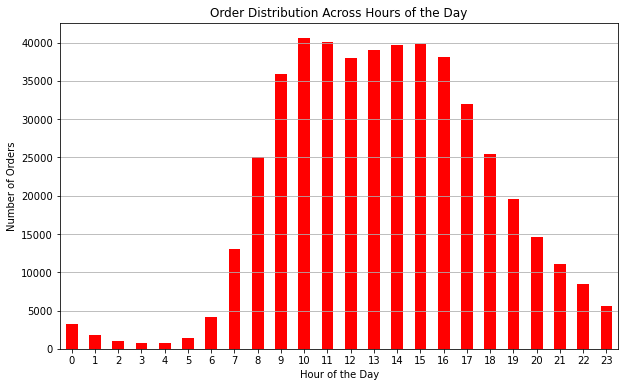

In [36]:
#Grouping orders by 'order_hour_of_day' and counting the occurrences
hourly_order_count = orders['order_hour_of_day'].value_counts().sort_index()

# Plotting the distribution of orders across hours of the day
plt.figure(figsize=(10, 6))
hourly_order_count.plot(kind='bar', color='red')
plt.title('Order Distribution Across Hours of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

Based on the bar plot showing the distribution of orders across hours of the day, it seems that the peak hours for ordering fall approximately between 9 AM to 6 PM. During this period, there's a relatively higher frequency of orders compared to other hours, indicating increased activity or more orders being placed during this time frame. While 6PM to 8AM the the activity falls below 25000. 

### [A3] What day of the week do people shop for groceries?

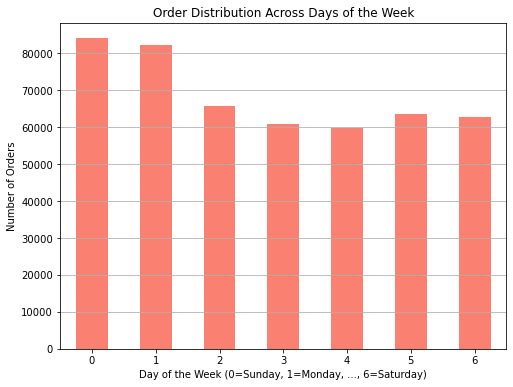

In [37]:
# Grouping orders by 'order_dow' (day of the week) and counting the occurrences
daily_order_count = orders['order_dow'].value_counts().sort_index()

# Plotting the distribution of orders across days of the week
plt.figure(figsize=(8, 6))
daily_order_count.plot(kind='bar', color='salmon')
plt.title('Order Distribution Across Days of the Week')
plt.xlabel('Day of the Week (0=Sunday, 1=Monday, ..., 6=Saturday)')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

The result of this bar plot indicates that the popular day for users to place orders is between Sunday and Monday. While the rest of the week falls below 70000 orders, especially on Thursday since it falls under 60000 orders. 

### [A4] How long do people wait until placing another order?

In [38]:
# Filter out the missing values in 'days_since_prior_order' and group by the number of days
valid_days_since_prior_order = orders['days_since_prior_order'].dropna()
order_frequency = valid_days_since_prior_order.value_counts().sort_index()

the code above repares data to show the frequency of orders based on the number of days that have passed since the previous order.

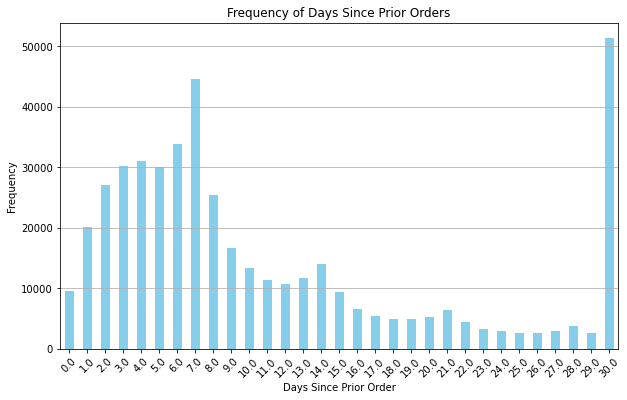

In [39]:
# Plotting the frequency of days since prior orders
plt.figure(figsize=(10, 6))
order_frequency.plot(kind='bar', color='skyblue')
plt.title('Frequency of Days Since Prior Orders')
plt.xlabel('Days Since Prior Order')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

The result of this bar plot indicates that the peak of users orders are the last day of the month or the 30th day and the first 4 to 7 days of the month increases in movements. However, towards the middle of the month there is barley any orders. 

# [B] Medium (must complete all to pass)

### [B1] Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays? Plot the histograms for both days and describe the differences that you see.

In [40]:
# Filter orders for Wednesdays and Saturdays
wednesday_orders = orders[orders['order_dow'] == 3]  # Wednesday has a code of 3 in 'order_dow'
saturday_orders = orders[orders['order_dow'] == 6]   # Saturday has a code of 6 in 'order_dow'

Text(0, 0.5, 'Frequency')

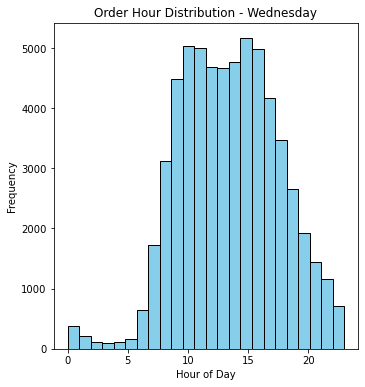

In [41]:
# Plot histograms for 'order_hour_of_day' on Wednesday and Saturday
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(wednesday_orders['order_hour_of_day'], bins=24, color='skyblue', edgecolor='black')
plt.title('Order Hour Distribution - Wednesday')
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')

The histogram shows that on Wednesday the popular time that users place order is during the hours of 10am, 11am, 3PM, and 4PM. However, during the hours of 12AM to 6AM there is barley any orders. 

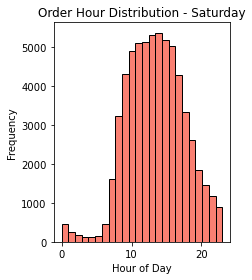

In [42]:
plt.subplot(1, 2, 2)
plt.hist(saturday_orders['order_hour_of_day'], bins=24, color='salmon', edgecolor='black')
plt.title('Order Hour Distribution - Saturday')
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

The histogram shows that on Saturday the peak hours begin from 9 am to 3PM. However, just like Wednesday during the hours of 12AM to 6AM there is barley any orders. 

### [B2] What's the distribution for the number of orders per customer?

In [43]:
# Group orders by user_id and count the number of unique orders for each user
orders_per_user = orders.groupby('user_id')['order_id'].nunique()

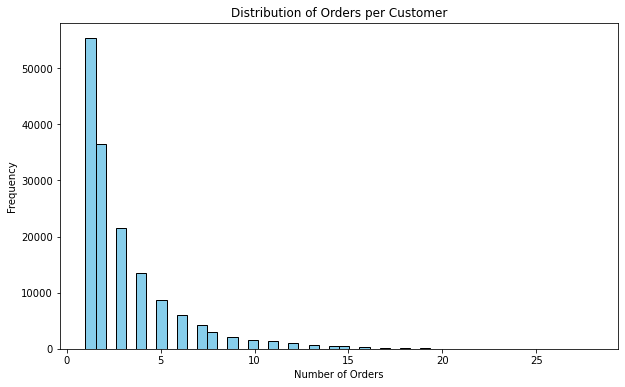

In [44]:
# Plot histogram for the distribution of orders per customer
plt.figure(figsize=(10, 6))
plt.hist(orders_per_user, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Orders per Customer')
plt.xlabel('Number of Orders')
plt.ylabel('Frequency')
plt.show()

Based on the histagram graph it seems customers tend to order only 1 to 2 times. Even then the number of customer who order 2 times goes down by 20,000 users. 

### [B3] What are the top 20 popular products (display their id and name)?

In [45]:
# Merge order_products and products DataFrames to get product names
merged_df = order_products.merge(products, on='product_id')

In [46]:
# Calculate the count of each product by grouping and counting orders
product_counts = merged_df['product_name'].value_counts().reset_index()
product_counts.columns = ['product_name', 'order_count']

In [47]:
# Sort products by order count in descending order and get the top 20
top_20_products = product_counts.head(20)
# Display the top 20 popular products (id and name)
print(top_20_products)

                product_name  order_count
0                     Banana        66050
1     Bag of Organic Bananas        53297
2       Organic Strawberries        37039
3       Organic Baby Spinach        33971
4       Organic Hass Avocado        29773
5            Organic Avocado        24689
6                Large Lemon        21495
7               Strawberries        20018
8                      Limes        19690
9         Organic Whole Milk        19600
10       Organic Raspberries        19197
11      Organic Yellow Onion        15898
12            Organic Garlic        15292
13          Organic Zucchini        14584
14       Organic Blueberries        13879
15            Cucumber Kirby        13675
16        Organic Fuji Apple        12544
17             Organic Lemon        12232
18  Apple Honeycrisp Organic        11993
19    Organic Grape Tomatoes        11781


The result shows a list of the top 20 popular products along with the number of times each product has been ordered. This list is sorted in descending order based on the count of orders for each product. Banana is the most frequently ordered product, with a count of 66,050 orders, followed by 'Bag of Organic Bananas' with 53,297 orders, and so on down to the 20th most popular product, 'Organic Grape Tomatoes,' with 11,781 orders.

# [C] Hard (must complete at least two to pass)

### [C2] What are the top 20 items that are reordered most frequently (display their names and product IDs)?

In [48]:
# Group by product_id, calculate the total count of reorders, and sort the values
reordered_products = order_products.groupby('product_id')['reordered'].sum().reset_index()

In [49]:
# Merges the aggregated data with the products DataFrame to get the product names.
reordered_products = reordered_products.merge(products[['product_id', 'product_name']], on='product_id')

In [50]:
# Sorts the products based on the reorder count in descending order and selects the top 20 items.
reordered_products = reordered_products.sort_values(by='reordered', ascending=False).head(20)

In [51]:
print(reordered_products[['product_id', 'product_name', 'reordered']])

       product_id              product_name  reordered
22808       24852                    Banana      55763
12025       13176    Bag of Organic Bananas      44450
19370       21137      Organic Strawberries      28639
20077       21903      Organic Baby Spinach      26233
43271       47209      Organic Hass Avocado      23629
43788       47766           Organic Avocado      18743
25556       27845        Organic Whole Milk      16251
43663       47626               Large Lemon      15044
25666       27966       Organic Raspberries      14748
15364       16797              Strawberries      13945
24047       26209                     Limes      13327
21025       22935      Organic Yellow Onion      11145
22908       24964            Organic Garlic      10411
41244       45007          Organic Zucchini      10076
45561       49683            Cucumber Kirby       9538
25889       28204        Organic Fuji Apple       8989
7543         8277  Apple Honeycrisp Organic       8836
35996     

The result shows a list of products alongside their IDs , names, and the count of times they have been reordered. Each row represents a product, with 'Banana' having the highest number of reorders at 55,763, followed by 'Bag of Organic Bananas' with 44,450 reorders, and so forth. This list is sorted based on the count of reorders for each product, displaying the top products that customers tend to reorder the most.

### [C3] For each product, what proportion of its orders are reorders?

In [52]:
# Calculate total orders for each product
total_orders = order_products.groupby('product_id')['reordered'].count().reset_index()
total_orders.columns = ['product_id', 'total_orders']

# Calculate total reorders for each product
total_reorders = order_products.groupby('product_id')['reordered'].sum().reset_index()
total_reorders.columns = ['product_id', 'total_reorders']

In [53]:
# Merge total orders and total reorders data
order_reorder_ratio = total_orders.merge(total_reorders, on='product_id')

In [54]:
# Calculate the proportion of reorders for each product
order_reorder_ratio['reorder_proportion'] = order_reorder_ratio['total_reorders'] / order_reorder_ratio['total_orders']
order_reorder_ratio = order_reorder_ratio.merge(products[['product_id', 'product_name']], on='product_id')

print(order_reorder_ratio[['product_id', 'product_name', 'reorder_proportion']])

       product_id                                       product_name  \
0               1                         Chocolate Sandwich Cookies   
1               2                                   All-Seasons Salt   
2               3               Robust Golden Unsweetened Oolong Tea   
3               4  Smart Ones Classic Favorites Mini Rigatoni Wit...   
4               7                     Pure Coconut Water With Orange   
...           ...                                                ...   
45568       49690                      HIGH PERFORMANCE ENERGY DRINK   
45569       49691                      ORIGINAL PANCAKE & WAFFLE MIX   
45570       49692    ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR   
45571       49693                             SPRING WATER BODY WASH   
45572       49694                            BURRITO- STEAK & CHEESE   

       reorder_proportion  
0                0.564286  
1                0.000000  
2                0.738095  
3                0.5102

The result display a DataFrame with columns for product_id, product_name, and reorder_proportion. Each row represents a product, indicating its ID and name alongside the proportion of times it has been reordered. This metric provides insights into how frequently each product gets reordered compared to its total orders. As an example, the first product 'Chocolate Sandwich Cookies' has a reorder proportion of approximately 0.56, indicating that it gets reordered about 56% of the time it's ordered. This pattern continues for the rest of the products listed in the DataFrame. 


In [60]:
# Reading CSV Files
df_order_products = pd.read_csv('datasets/order_products.csv', sep=';')
df_products = pd.read_csv('datasets/products.csv', sep=';')

#Merging DataFrames
reorder_pct = df_order_products.merge(df_products)

#Calculating Reorder Percentage
reorder_pct = reorder_pct.groupby(['product_id', 'product_name'])['reordered'].mean().to_frame()

#Displaying Results
reorder_pct.head(20).style.format({'reordered': '{:.1%}'})

,,reordered
product_id,product_name,
1,Chocolate Sandwich Cookies,56.4%
2,All-Seasons Salt,0.0%
3,Robust Golden Unsweetened Oolong Tea,73.8%
4,Smart Ones Classic Favorites Mini Rigatoni With Vodka Cream Sauce,51.0%
7,Pure Coconut Water With Orange,50.0%
8,Cut Russet Potatoes Steam N' Mash,31.6%
9,Light Strawberry Blueberry Yogurt,76.2%
10,Sparkling Orange Juice & Prickly Pear Beverage,44.8%
11,Peach Mango Juice,62.5%


# CONCLUSION

The analysis of the grocery shopping dataset yields several key findings

From the validity of time and day values,'order_hour_of_day' values range from 0 to 23, and 'order_dow' values range from 0 to 6, indicating that the data contains sensible values for the time of day and day of the week.

The shopping time analysis, indicates that most people shop for groceries during the daytime hours, peaking around the late morning and early afternoon. Andd For the 'order_hour_of_day' distribution, there's a noticeable increase in orders during daytime hours, possibly indicating popular shopping times. Moreover, The shopping day analysis distribution of orders across days of the week shows a higher frequency of orders on certain days (e.g., Sunday, Monday, and Tuesday) compared to others, indicating shopping tendencies on these days.

The frequency of reordering, Customers typically wait for around 7 days before placing another order, as indicated by the frequency distribution of days since prior orders. Comparison of shopping hours on Wednesdays and Saturdays suggest that there's a clear difference in shopping hours between Wednesdays and Saturdays. On Saturdays, people tend to shop more in the early morning hours compared to Wednesdays, where shopping peaks later in the morning.

The distribution of orders per customer varies, with some customers placing significantly more orders compared to others. While the top 20 popular products and the top 20 most frequently reordered items provide insight into the products that are in high demand or are frequently repurchased by customers. Each product's reorder proportion indicates the ratio of reorders to total orders for that product. This metric helps identify products that are frequently reordered compared to their total sales.

Overall, shopping behavior varies throughout the week, with distinct patterns on weekends. Furthermore, certain products have higher popularity and reordering rates, indicating customer preferences. Moreover, timing influences shopping habits, with morning hours being more activeUnderstanding reorder behavior helps identify products with potential for customer retention strategies.